Dataset: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

## Librerias

In [1]:
pip -q install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packa

In [2]:
pip -q install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.1 MB/s eta 0:00:00


In [3]:
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from dataprep.eda import create_report
from sklearn.metrics import r2_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
import pandas as pd
import numpy as np
import random
import pickle
import shap

## Recoleccion de data

In [4]:
df = pd.read_csv('/content/mobile_prices.csv')
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Preparacion y Preprocesamiento de la data

In [5]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df['price_range']

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [8]:
def precios(precio):
    if precio == 0:
        return random.randint(1, 100)
    elif precio == 1:
        return random.randint(101, 300)
    elif precio == 2:
        return random.randint(301, 600)
    elif precio == 3:
        return random.randint(601, 1000)

In [9]:
df['price_range'] = df['price_range'].apply(precios)

In [10]:
df['price_range']

0       200
1       520
2       392
3       482
4       184
       ... 
1995     97
1996    551
1997    601
1998     43
1999    998
Name: price_range, Length: 2000, dtype: int64

In [11]:
df.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [12]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Análisis descriptivo de la data (EDA)

In [13]:
rep = create_report(df)
rep.save("Reporte")

Report has been saved to Reporte.html!


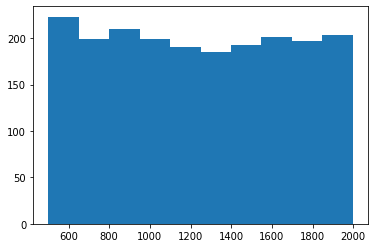

In [14]:
plt.hist(df['battery_power'])
plt.show()

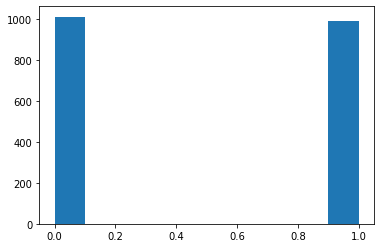

In [15]:
plt.hist(df['blue'])
plt.show()

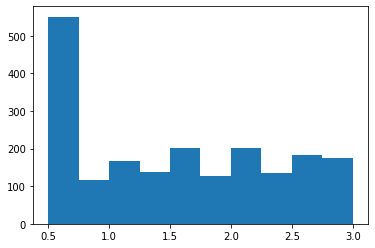

In [16]:
plt.hist(df['clock_speed'])
plt.show()

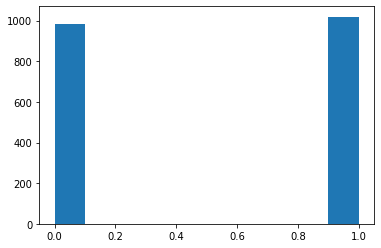

In [17]:
plt.hist(df['dual_sim'])
plt.show()

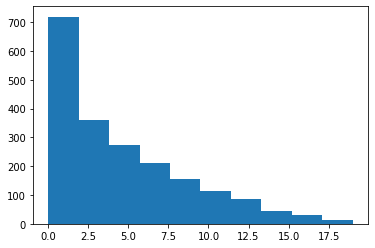

In [18]:
plt.hist(df['fc'])
plt.show()

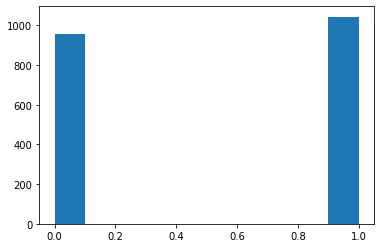

In [19]:
plt.hist(df['four_g'])
plt.show()

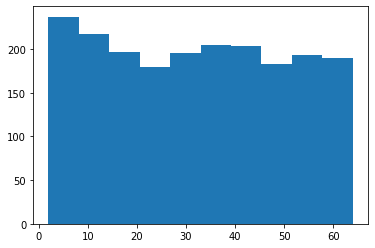

In [20]:
plt.hist(df['int_memory'])
plt.show()

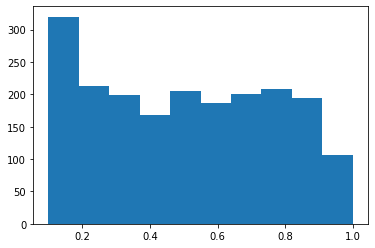

In [21]:
plt.hist(df['m_dep'])
plt.show()

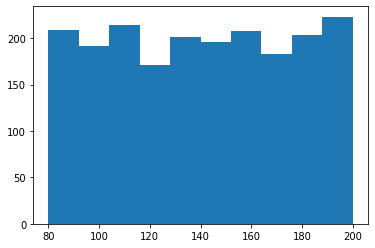

In [22]:
plt.hist(df['mobile_wt'])
plt.show()

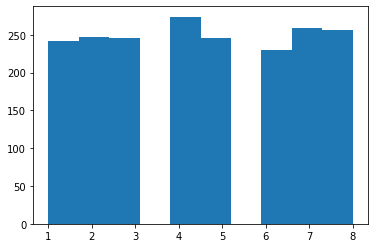

In [23]:
plt.hist(df['n_cores'])
plt.show()

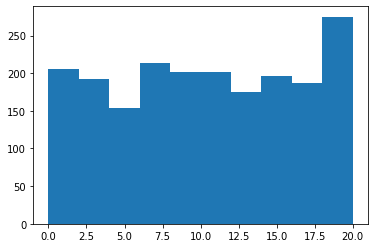

In [24]:
plt.hist(df['pc'])
plt.show()

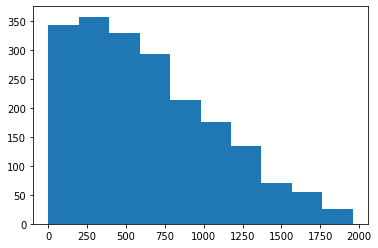

In [25]:
plt.hist(df['px_height'])
plt.show()

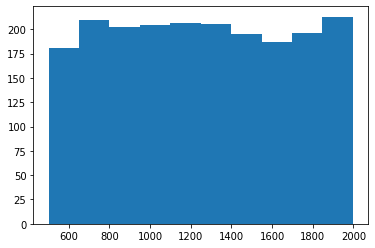

In [26]:
plt.hist(df['px_width'])
plt.show()

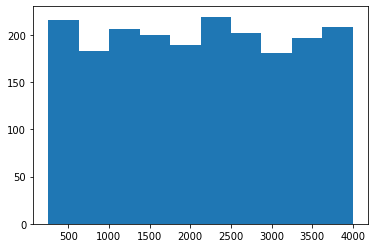

In [27]:
plt.hist(df['ram'])
plt.show()

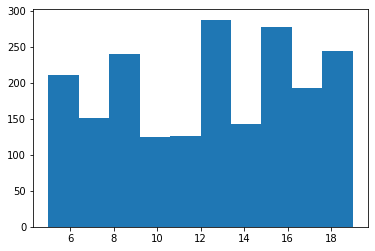

In [28]:
plt.hist(df['sc_h'])
plt.show()

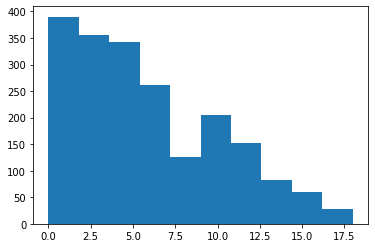

In [29]:
plt.hist(df['sc_w'])
plt.show()

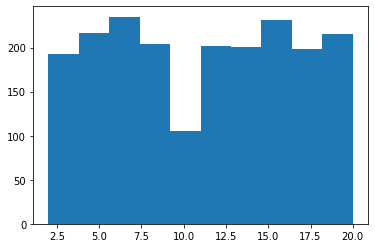

In [30]:
plt.hist(df['talk_time'])
plt.show()

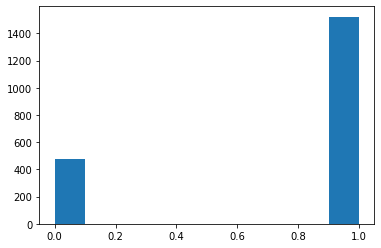

In [31]:
plt.hist(df['three_g'])
plt.show()

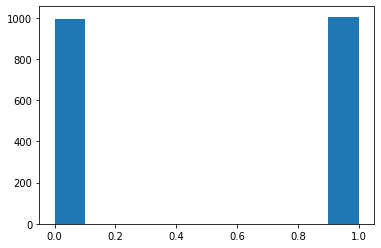

In [32]:
plt.hist(df['touch_screen'])
plt.show()

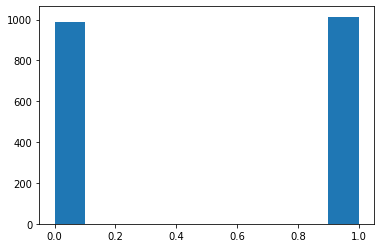

In [33]:
plt.hist(df['wifi'])
plt.show()

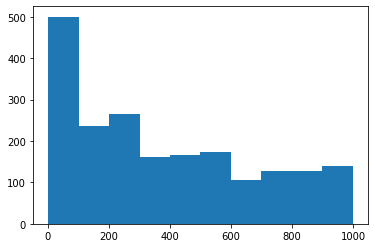

In [34]:
plt.hist(df['price_range'])
plt.show()

## Entrenamiento del modelo

In [35]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [36]:
numerical_columns = x.columns[(x.dtypes == "float64") | (x.dtypes == "int64")]
categorical_columns = x.columns[(x.dtypes == "object")]

In [37]:
col_transf = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough")

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

In [39]:
models = []
models.append(("LR", LinearRegression()))
models.append(("RR", Ridge()))
models.append(("BR", BayesianRidge()))
models.append(("LASSO", Lasso()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("SVR", SVR()))
models.append(("NNMLP", MLPRegressor()))

In [40]:
pipelines = {name: make_pipeline(col_transf, model) for name, model in models}

In [41]:
results = []
scoring = 'r2'
kfolds = 5

for name, pipeline in pipelines.items():
	cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfolds, scoring=scoring)
	results.append({name: cv_results})

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [42]:
results

[{'LR': array([0.81293774, 0.81462397, 0.81412339, 0.81801702, 0.82682383])},
 {'RR': array([0.81296164, 0.81464875, 0.81416408, 0.81794783, 0.82682736])},
 {'BR': array([0.81303408, 0.8147228 , 0.81429489, 0.8176988 , 0.82683142])},
 {'LASSO': array([0.81310064, 0.8153513 , 0.81764911, 0.81926212, 0.82784204])},
 {'KNN': array([0.49614521, 0.54294129, 0.54601597, 0.5518055 , 0.51683191])},
 {'RF': array([0.85410933, 0.84227362, 0.84676293, 0.85895864, 0.84665268])},
 {'SVR': array([ 0.02223125, -0.022529  ,  0.04955749,  0.03128373,  0.04652548])},
 {'NNMLP': array([0.66257225, 0.68568835, 0.66515614, 0.61789922, 0.68766671])}]

In [43]:
best_model = sorted(results, key=lambda x: list(x.values())[0].mean(), reverse=True)[0]
best_pipeline = pipelines[list(best_model.keys())[0]]

In [44]:
best_model

{'RF': array([0.85410933, 0.84227362, 0.84676293, 0.85895864, 0.84665268])}

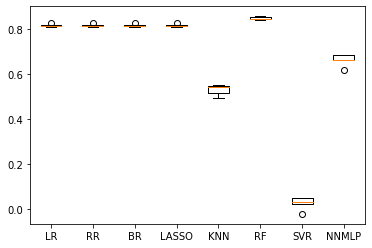

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot([list(dict_.values())[0] for dict_ in results])
ax.set_xticklabels([list(dict_.keys())[0] for dict_ in results])
plt.show()

In [46]:
best_pipeline.fit(X_train, y_train)
best_pipeline.predict(X_test)

array([ 57.22, 502.16, 140.48, 510.35, 814.66, 220.13, 843.33, 799.93,
       284.14, 281.16, 227.37,  49.69, 426.13, 793.47, 116.67, 803.84,
       445.22, 197.78, 196.73, 811.14,  71.68, 664.67,  50.08, 215.67,
       775.61, 391.02, 323.31,  62.3 ,  54.93, 327.67,  50.5 , 710.72,
        66.63, 120.05, 235.47,  55.88, 833.1 ,  68.37, 607.64, 411.81,
       168.31, 213.89, 750.92, 731.58, 564.52,  54.65, 648.34, 447.63,
       197.7 , 608.22, 189.65, 780.66, 814.17, 442.04, 736.94,  54.49,
       216.15,  75.98, 190.62, 260.91, 171.39, 480.56, 205.99, 584.42,
        66.18, 428.51,  75.16, 189.4 ,  50.64, 715.24, 213.94, 115.74,
        81.86, 434.79,  47.65, 460.23, 505.95, 776.3 , 484.49, 515.48,
       678.07, 356.42, 475.07,  83.75,  58.08, 838.37, 633.47, 404.3 ,
        61.91, 179.97, 189.71, 444.1 ,  66.72,  59.45, 199.52, 533.78,
        58.77, 819.  , 499.95,  64.49, 198.96, 818.21, 201.42, 212.81,
       639.  , 836.95, 782.93, 714.73, 460.87, 249.02, 777.2 , 212.13,
      

In [47]:
y_true = y_test
y_pred = best_pipeline.predict(X_test)

In [48]:
print(r2_score(y_true, y_pred))

0.8616912762594715


## Despliegue del modelo y api externa

In [49]:
filename = 'mobile_prices.pkl'
pickle.dump(best_pipeline, open(filename, 'wb'))

In [86]:
import pandas as pd
import sklearn
import pickle

if __name__ == '__main__':
  mp_mod = pickle.load(open('mobile_prices.pkl', mode = 'rb'))
  
  print("Bienvenid@! Digita los datos del celular.")

  battery_power = input("\nBateria total que el celular puede almacenar en miliamperios(mAH): ")
  talk_time = input("Tiempo que dura la bateria sin cargar: ")
  int_memory = input("Gigabytes de la memoria interna: ")
  clock_speed = input("Velocidad del microprocesador: ")
  n_cores = input("Numero de nucleos del procesador: ")
  ram = input("Ram del telefono en megabytes: ")
  dual_sim = input("Tiene dual sim (1: si, 0: no): ")
  blue = input("Tiene bluetooth (1: si, 0: no): ")
  wifi = input("Puede usar wifi (1: si, 0: no): ")
  three_g = input("Puede utilizar 3G (1: si, 0: no): ")
  four_g = input("Puede utilizar 4G (1: si, 0: no): ")
  touch_screen = input("El celular es touch (1: si, 0: no):")
  pc = input("Megapixeles de la camara principal: ")
  fc = input("Megapixeles de la camara frontal: ")
  px_height = input("Resolucion de la altura en pixeles: ")
  px_width = input("Resolucion del ancho en pixeles: ")
  sc_h = input("Altura del telefono en cm: ")
  sc_w = input("Anchura del telefono en cm: ")
  m_dep = input("Profundidad del celular en cm: ")
  mobile_wt = input("Peso del celular: ")

  celular = pd.DataFrame([battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi])
  celular = celular.transpose().rename(columns={0: 'battery_power', 1: 'blue', 2: 'clock_speed', 3: 'dual_sim', 4: 'fc', 5: 'four_g', 6: 'int_memory', 7: 'm_dep', 8: 'mobile_wt', 9: 'n_cores', 10: 'pc', 11: 'px_height', 12: 'px_width', 13: 'ram', 14: 'sc_h', 15: 'sc_w', 16: 'talk_time', 17: 'three_g', 18: 'touch_screen', 19: 'wifi'})

  prediccion = mp_mod.predict(celular)

  print(f"\nEl precio del elefono es: {prediccion[0]}")

Bienvenid@! Digita los datos del celular.

Bateria total que el celular puede almacenar en miliamperios(mAH): 2000
Tiempo que dura la bateria sin cargar: 20
Gigabytes de la memoria interna: 6
Velocidad del microprocesador: 0.9
Numero de nucleos del procesador: 6
Ram del telefono en megabytes: 6000
Tiene dual sim (1: si, 0: no): 1
Tiene bluetooth (1: si, 0: no): 1
Puede usar wifi (1: si, 0: no): 1
Puede utilizar 3G (1: si, 0: no): 1
Puede utilizar 4G (1: si, 0: no): 0
El celular es touch (1: si, 0: no):1
Megapixeles de la camara principal: 20
Megapixeles de la camara frontal: 20
Resolucion de la altura en pixeles: 1900
Resolucion del ancho en pixeles: 800
Altura del telefono en cm: 50
Anchura del telefono en cm: 5
Profundidad del celular en cm: 0.5
Peso del celular: 30

El precio del elefono es: 787.81


In [87]:
explainer = shap.Explainer(mp_mod['randomforestregressor'])
valores_shap = explainer(celular)

In [104]:
celulares = pd.DataFrame(best_pipeline[0].transform(X_test.sample(100)), columns=best_pipeline[0].get_feature_names_out())

In [105]:
explainer2 = shap.Explainer(best_pipeline[1].predict, celulares)

In [106]:
valores_shap2 = explainer2(celulares)

X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestReg

In [88]:
valores_shap

.values =
array([[ 3.24881968e+01,  3.28978729e-01,  3.41269184e-01,
        -5.62961703e-02, -2.73324050e+00,  1.26223644e-01,
        -2.45592761e+00,  3.23996808e-01, -2.42479416e+01,
        -3.47164593e+00, -3.40281624e-01,  3.25531726e+01,
         1.88495458e+01,  2.94062194e+02, -3.02248800e+00,
         1.25259571e+00, -4.23183202e+00, -1.05579409e-01,
         2.10596444e-01, -1.06687413e+00]])

.base_values =
array([[381.6453375]])

.data =
array([['2000', '1', '0.9', '1', '20', '0', '6', '0.5', '30', '6', '20',
        '1900', '800', '6000', '50', '5', '20', '1', '1', '1']],
      dtype=object)

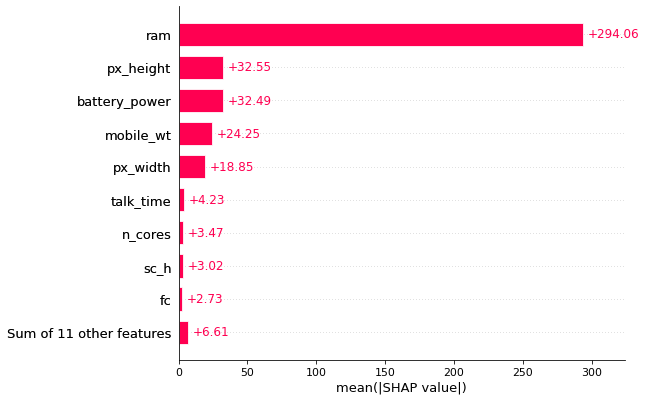

In [89]:
shap.plots.bar(valores_shap)

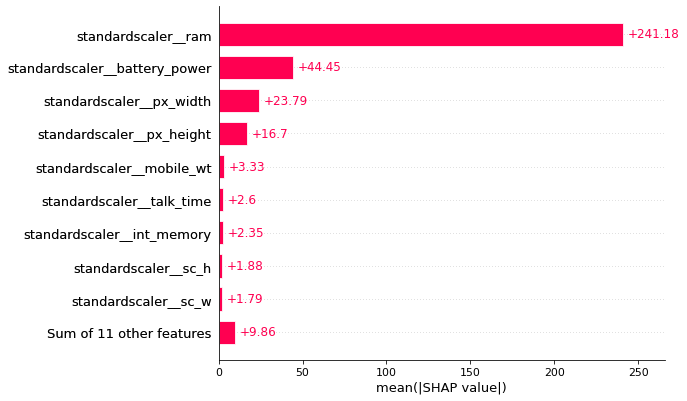

In [107]:
shap.plots.bar(valores_shap2)

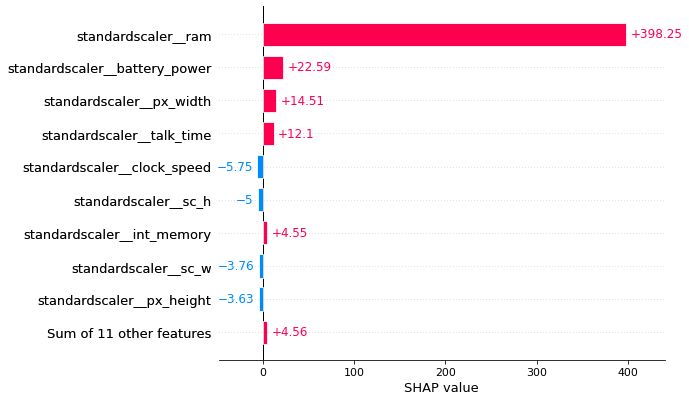

In [108]:
shap.plots.bar(valores_shap2[0])

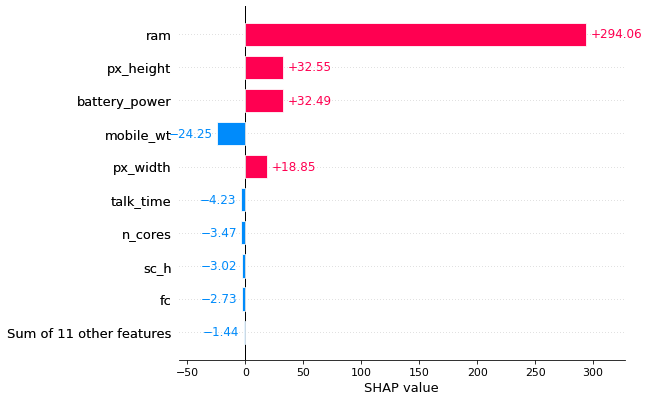

In [90]:
shap.plots.bar(valores_shap[0])

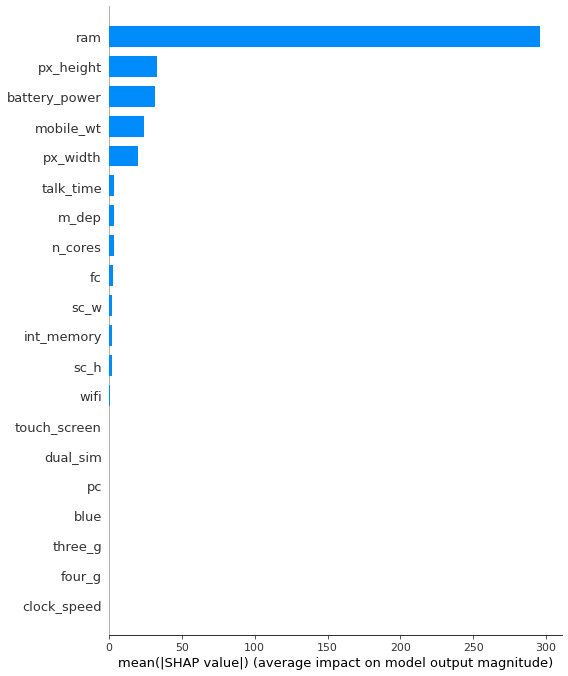

In [67]:
plt.figure(figsize=(10,6))
shap.summary_plot(valores_shap, features=celular, plot_type='bar')
plt.show()